# <p style='color: lightgreen;' > Spotify Exploratory Data Analysis (EDA) </p>

### Goal of EDA:
    * Analyze the data set by summarizin the main characteristics of the data, complemented with visualization representations
    * Understand the data's structure, its outliers and anamolies
    * Uncover underlying patterns before applying more complex statistical modeling or machine learning algorithms.

### Key aspects of EDA:
    1. Descriptive Statistics: Calculating measures such as mean, median, mode, standard deviation, and range to summarize the data.

    2. Data Visualization: Creating plots and graphs like histograms, scatter plots, box plots, and bar charts to visualize data distributions and relationships between variables.

    3. Data Cleaning: Identifying and handling missing values, duplicates, and errors in the data set.

    4. Outlier Detection: Identifying and analyzing outliers to understand their impact on the data set.

    5. Correlation Analysis: Examining relationships between variables to identify any associations or dependencies.

    6. Hypothesis Generation: Formulating hypotheses about the data that can be tested with more formal statistical methods or experiments.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn

In [2]:
df = pd.read_csv('dataset-2.csv',
                 index_col='track_id')
df.head()

,Unnamed: 0,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
4qPNDBW1i3p13qLCt0Ki3A,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
1iJBSr7s7jYXzM8EGcbK5b,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
6lfxq3CG4xtTiEg7opyCyx,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
5vjLSffimiIP26QG5WcN2K,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# <p style='color:lightgreen;'> Data Cleaning </p>

First we need to clean the data of any nulls, duplicates, and features we amy deem as unncessary at first glance.

The column "Unnamed: 0" seems to be an for the dataset that increments that was repeated twice. We don't need this column and can drop this column.

The data has one row with nulls in three crucial features: artists, album_name, and track_name.

Then we have 577 duplicates in the data which will need to be dropped as well.

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [7]:
df.isna().any(), df.isna().sum()

(artists              True
 album_name           True
 track_name           True
 popularity          False
 duration_ms         False
 explicit            False
 danceability        False
 energy              False
 key                 False
 loudness            False
 mode                False
 speechiness         False
 acousticness        False
 instrumentalness    False
 liveness            False
 valence             False
 tempo               False
 time_signature      False
 track_genre         False
 dtype: bool,
 artists             1
 album_name          1
 track_name          1
 popularity          0
 duration_ms         0
 explicit            0
 danceability        0
 energy              0
 key                 0
 loudness            0
 mode                0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 time_signature      0
 track_genre         0
 dtype: int64)

In [8]:
df.loc[df['artists'].isna()]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,,,,,,,,,,,,,,,,,,,
1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [9]:
df.loc[df['album_name'].isna()]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,,,,,,,,,,,,,,,,,,,
1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [10]:
df.loc[df['track_name'].isna()]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,,,,,,,,,,,,,,,,,,,
1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [11]:
df.isna().value_counts()

artists  album_name  track_name  popularity  duration_ms  explicit  danceability  energy  key    loudness  mode   speechiness  acousticness  instrumentalness  liveness  valence  tempo  time_signature  track_genre
False    False       False       False       False        False     False         False   False  False     False  False        False         False             False     False    False  False           False          113999
True     True        True        False       False        False     False         False   False  False     False  False        False         False             False     False    False  False           False               1
Name: count, dtype: int64

In [12]:
df.drop(['1kR4gIb7nGxHPI3D2ifs59'], inplace=True)


In [17]:
df.isna().value_counts()

artists  album_name  track_name  popularity  duration_ms  explicit  danceability  energy  key    loudness  mode   speechiness  acousticness  instrumentalness  liveness  valence  tempo  time_signature  track_genre
False    False       False       False       False        False     False         False   False  False     False  False        False         False             False     False    False  False           False          113999
Name: count, dtype: int64

In [21]:
df.duplicated().value_counts()

False    113422
True        577
Name: count, dtype: int64

In [28]:
df[df.duplicated()]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,,,,,,,,,,,,,,,,,,,
0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
77s65ayZ3gXbqMV8jKH1A3,The Killers;Ryan Pardey,Alternative Christmas 2022,Don't Shoot Me Santa,0,245106,False,0.588,0.847,8,-4.164,1,0.0705,0.060100,0.000000,0.3070,0.662,120.041,4,alt-rock
4fdy3vg2bCXU6L77vC6li8,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,-8.163,1,0.0288,0.316000,0.171000,0.2130,0.186,77.983,3,alt-rock
7mntHnF2frXuZwFAp8ouCB,Weezer,Alternative Christmas 2022,We Wish You A Merry Christmas,0,84973,False,0.387,0.786,11,-4.127,1,0.0436,0.019500,0.000000,0.1230,0.462,149.806,3,alt-rock
2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [47]:
df = df.drop_duplicates()

In [49]:
df.shape

(113422, 19)

Now the data is clean of any duplicates and nulls. We can save a clean version of the data in a separate csv file. Then we can begin to perform our EDA.

In [50]:
df.to_csv('spotify_db.csv')

In [147]:
df = pd.read_csv('spotify_db.csv')
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113422 entries, 0 to 113421
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113422 non-null  object 
 1   artists           113422 non-null  object 
 2   album_name        113422 non-null  object 
 3   track_name        113422 non-null  object 
 4   popularity        113422 non-null  int64  
 5   duration_ms       113422 non-null  int64  
 6   explicit          113422 non-null  bool   
 7   danceability      113422 non-null  float64
 8   energy            113422 non-null  float64
 9   key               113422 non-null  int64  
 10  loudness          113422 non-null  float64
 11  mode              113422 non-null  int64  
 12  speechiness       113422 non-null  float64
 13  acousticness      113422 non-null  float64
 14  instrumentalness  113422 non-null  float64
 15  liveness          113422 non-null  float64
 16  valence           11

## <p style='color:lightgreen;'> 1. Descriptive Statistics: </p>

Calculating measures such as mean, median, mode, standard deviation, and range to summarize the data.

In [148]:

df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113422.000000,1.134220e+05,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000
mean,33.359674,2.281011e+05,0.567113,0.642174,5.309332,-8.242913,0.637681,0.084697,0.314075,0.155802,0.213610,0.474239,122.176181,3.904225
std,22.269626,1.064508e+05,0.173402,0.251031,3.559767,5.011931,0.480673,0.105803,0.331943,0.309314,0.190481,0.259239,29.972104,0.432077
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741700e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.299000,4.000000
50%,35.000000,2.130160e+05,0.580000,0.685000,5.000000,-6.996000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.019000,4.000000
75%,50.000000,2.616000e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084575,0.596000,0.048700,0.273000,0.683000,140.073000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [149]:
df['popularity'].loc[df['popularity']==0].count()

15726

In [150]:
df['key'].loc[df['key']== 0].count()

12983

In [151]:
df['speechiness'].loc[df['speechiness']==0].count()

157

In [152]:
genre_counts = df['track_genre'].value_counts()
artist_counts = df['artists'].value_counts()
track_counts = df['track_name'].value_counts()
album_counts = df['album_name'].value_counts()

In [153]:
genre_counts

track_genre
acoustic      1000
j-rock        1000
industrial    1000
mandopop      1000
pagode        1000
              ... 
honky-tonk     981
dance          962
german         961
classical      933
romance        904
Name: count, Length: 114, dtype: int64

In [154]:
artist_counts

artists
The Beatles                                           279
George Jones                                          260
Stevie Wonder                                         235
Linkin Park                                           224
Ella Fitzgerald                                       221
                                                     ... 
Darlene Zschech;West Australian Symphony Orchestra      1
Passion;Matt Redman                                     1
Rend Collective;Hillsong Young & Free                   1
Hillsong Worship;Aodhan King;Saye Pratt                 1
one sonic society;Mike Weaver                           1
Name: count, Length: 31437, dtype: int64

In [155]:
track_counts

track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 80
Little Saint Nick - 1991 Remix     74
Christmas Time                     72
                                 ... 
There Is None Like You              1
Open Space                          1
Forever Be Praised                  1
How Great Is Our God - Live         1
Promises Never Fail - Live          1
Name: count, Length: 73608, dtype: int64

In [156]:
album_counts

album_name
Feliz Cumpleaños con Perreo                     180
Alternative Christmas 2022                      156
Metal                                           143
Halloween con perreito                          122
Halloween Party 2022                            111
                                               ... 
Musica Relajante Para Que Estudien Los Niños      1
Detalles                                          1
Psalms                                            1
1 Por Amor, 2 Por Dinheiro                        1
Nada De Esquecer                                  1
Name: count, Length: 46589, dtype: int64

The data seems to have variety amount 0s accross its features.
These may need deeper analysis to determine whether to leave them as they are or replace their value with a method.

Furthermore, we have discovered that the data contains 114 different genre, 31437 different artists, 73608 different track names, and 46589 different album names.

Which means mulitple songs belong to one genre, artists, and albums. There are possibilities of different track_ids containing the same track_name.

## <p style='color:lightgreen;'>2. Data Visualization: </p>
Creating plots and graphs like histograms, scatter plots, box plots, and bar charts to visualize data distributions and relationships between variables.

## <p style='color:lightgreen;'> Distribution Analysis </p>

### <p style='color:lightblue;'>Histograms and Density Plots:</p>

Plot histograms or density plots to understand the distribution of numerical features.

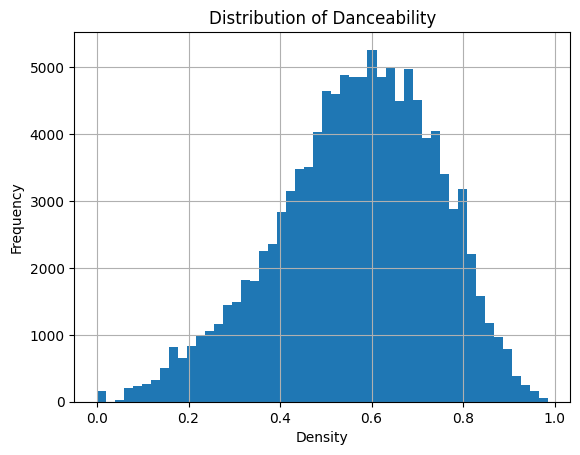

In [157]:
df['danceability'].hist(bins=50)
plt.title('Distribution of Danceability')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

Box Plots:

Use box plots to visualize the spread and identify outliers in features like popularity, energy, loudness, etc.

In [158]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

There are a lot of genres. Let's select the top 25 genres by popularity for the boxplot.

In [159]:
select_genres = df.groupby('track_genre')['popularity'].sum().sort_values(ascending=False).head(25)

In [160]:
df_filtered = df[df['track_genre'].isin(select_genres.index)]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(1, 0, 'acoustic'),
  Text(2, 0, 'ambient'),
  Text(3, 0, 'anime'),
  Text(4, 0, 'brazil'),
  Text(5, 0, 'british'),
  Text(6, 0, 'chill'),
  Text(7, 0, 'deep-house'),
  Text(8, 0, 'dubstep'),
  Text(9, 0, 'electronic'),
  Text(10, 0, 'emo'),
  Text(11, 0, 'grunge'),
  Text(12, 0, 'hard-rock'),
  Text(13, 0, 'indian'),
  Text(14, 0, 'k-pop'),
  Text(15, 0, 'mandopop'),
  Text(16, 0, 'metal'),
  Text(17, 0, 'metalcore'),
  Text(18, 0, 'pagode'),
  Text(19, 0, 'piano'),
  Text(20, 0, 'pop'),
  Text(21, 0, 'pop-film'),
  Text(22, 0, 'progressive-house'),
  Text(23, 0, 'psych-rock'),
  Text(24, 0, 'sad'),
  Text(25, 0, 'sertanejo')])

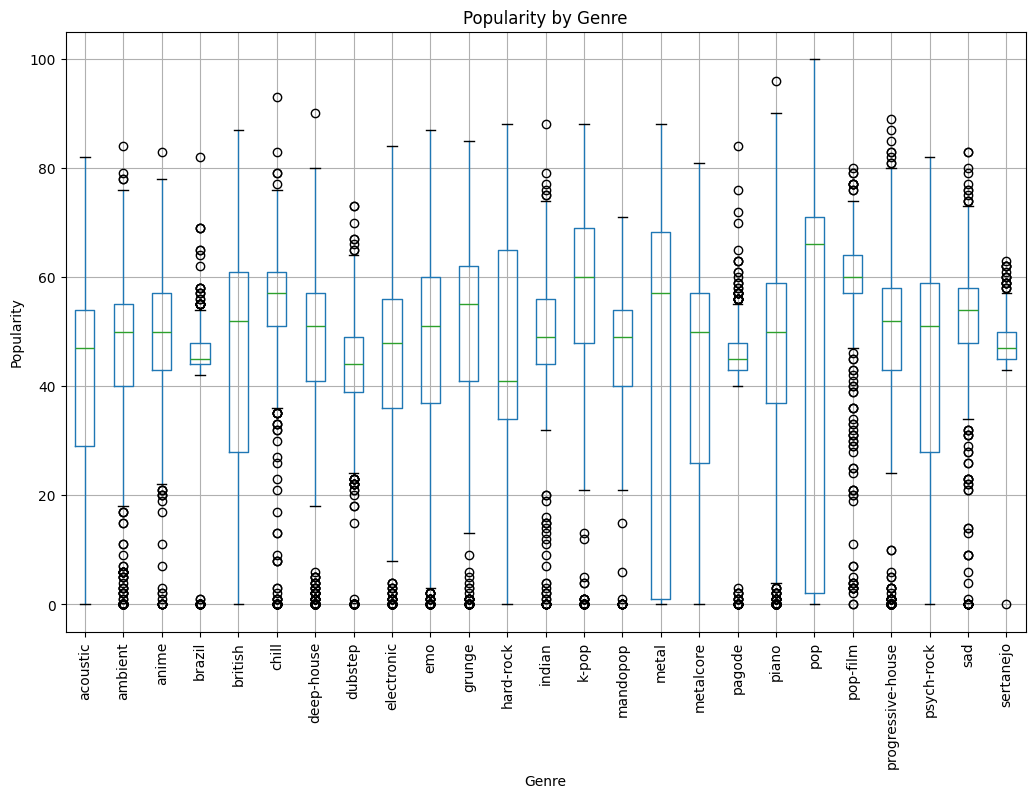

In [161]:
df_filtered.boxplot(column='popularity', by='track_genre', figsize=(12,8))
plt.title('Popularity by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)

The boxplot displays medians, min and max ranges, and outliers for each genre. Each genre is greatly skewed and the quality of the data is inconsistent since there are so many outliers.

## Correlation and Relationships

Correlation Matrix:

Compute and visualize the correlation matrix for numerical features to identify strong relationships.

In [166]:
numeric_df = df.select_dtypes(include=['int','float'])

In [174]:
corr_matrix = numeric_df.corr()
corr_matrix

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.008219,0.033795,-0.002976,-0.004077,0.047268,-0.014434,-0.045825,-0.022415,-0.095300,-0.005678,-0.041328,0.012151,0.030580
duration_ms,-0.008219,1.000000,-0.074215,0.058297,0.008729,-0.004060,-0.035946,-0.063182,-0.103815,0.125191,0.010226,-0.154780,0.024406,0.018273
danceability,0.033795,-0.074215,1.000000,0.131452,0.036291,0.256461,-0.069524,0.108020,-0.169145,-0.184030,-0.131636,0.476743,-0.051744,0.207204
energy,-0.002976,0.058297,0.131452,1.000000,0.047848,0.760545,-0.079399,0.141871,-0.732797,-0.180133,0.184712,0.258086,0.247308,0.186647
key,-0.004077,0.008729,0.036291,0.047848,1.000000,0.038138,-0.136099,0.020615,-0.040993,-0.006842,-0.001398,0.034202,0.010671,0.015249
loudness,0.047268,-0.004060,0.256461,0.760545,0.038138,1.000000,-0.042179,0.059971,-0.588066,-0.432198,0.076662,0.279165,0.212121,0.191772
mode,-0.014434,-0.035946,-0.069524,-0.079399,-0.136099,-0.042179,1.000000,-0.046652,0.096603,-0.050663,0.013946,0.021440,0.000340,-0.024277
speechiness,-0.045825,-0.063182,0.108020,0.141871,0.020615,0.059971,-0.046652,1.000000,-0.001252,-0.089300,0.205243,0.036278,0.017012,-0.000492
acousticness,-0.022415,-0.103815,-0.169145,-0.732797,-0.040993,-0.588066,0.096603,-0.001252,1.000000,0.102091,-0.020311,-0.106025,-0.207452,-0.175661
instrumentalness,-0.095300,0.125191,-0.184030,-0.180133,-0.006842,-0.432198,-0.050663,-0.089300,0.102091,1.000000,-0.079832,-0.324363,-0.049858,-0.082031


In [175]:
corr_matrix[(corr_matrix > 0.5) & (corr_matrix < 1) | (corr_matrix < -0.5)]

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,NaN,NaN,0.760545,NaN,NaN,-0.732797,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,0.760545,NaN,NaN,NaN,NaN,-0.588066,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,-0.732797,NaN,-0.588066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Scatter Plots:

Create scatter plots to explore relationships between pairs of numerical features (e.g., danceability vs. energy, popularity vs. valence).

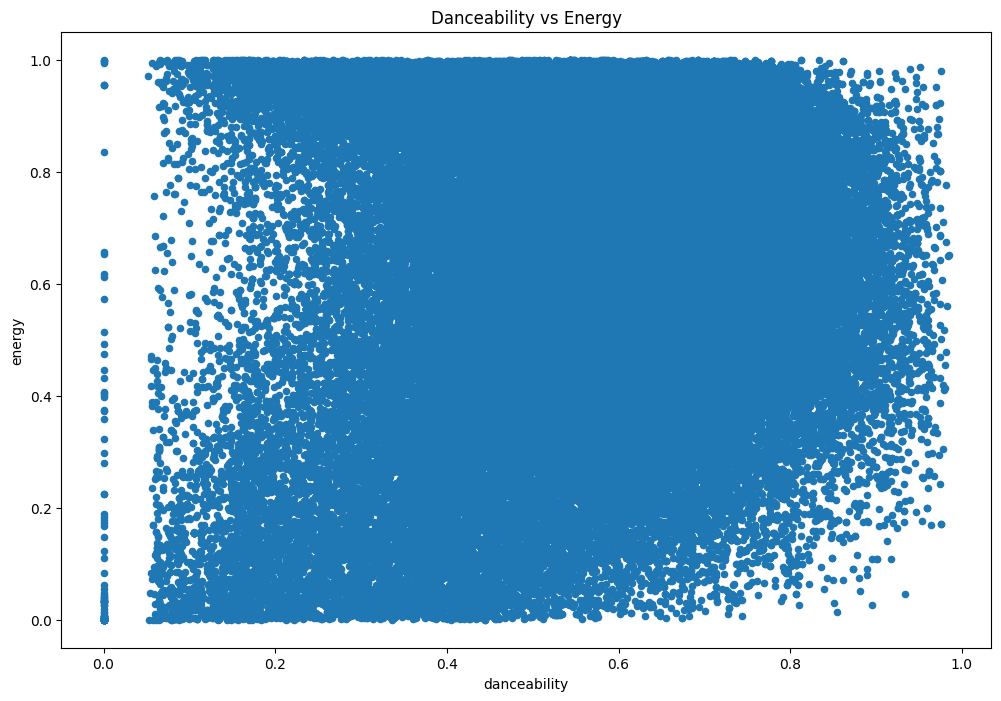

In [179]:
df.plot.scatter(x='danceability', y='energy', figsize=(12,8))
plt.title('Danceability vs Energy')
plt.show()

Text(0.5, 1.0, 'Popularity vs Valence')

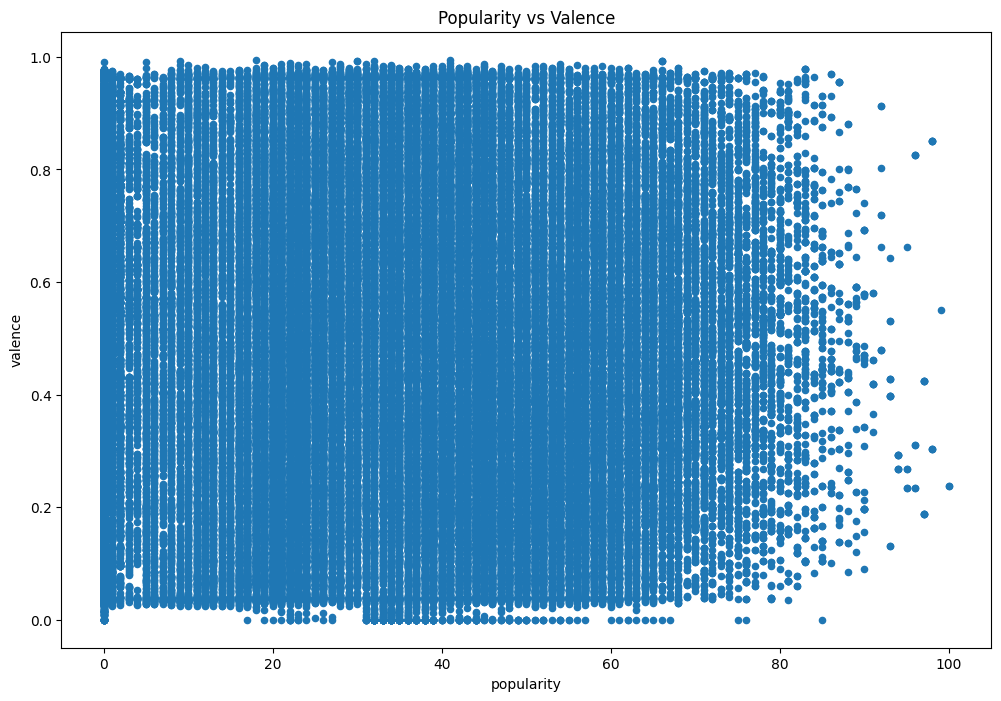

In [181]:
df.plot.scatter(x='popularity', y='valence', figsize=(12,8))
plt.title('Popularity vs Valence')

## Genre and Artist Analysis
Genre Analysis:

Calculate and compare the average values of features like danceability, energy, and valence for each track_genre.

In [258]:
#genre_means = df.groupby('track_genre').mean()
#print(genre_means[['danceability', 'energy', 'valence']])

genre_counts = df['track_genre'].value_counts()
genre_counts

track_genre
acoustic      1000
j-rock        1000
industrial    1000
mandopop      1000
pagode        1000
              ... 
honky-tonk     981
dance          962
german         961
classical      933
romance        904
Name: count, Length: 114, dtype: int64

In [267]:
genre_select_cols = ['track_genre'] + list(numeric_df)
genre_df = df[genre_select_cols]
genre_df.head()

,track_genre,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,acoustic,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,acoustic,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,acoustic,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,acoustic,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,acoustic,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [271]:
genre_avg_features = genre_df.groupby('track_genre').mean()

In [274]:
genre_analysis = genre_avg_features.join(genre_counts.rename('genre_count'))
genre_analysis = genre_analysis.sort_values(by='genre_count', ascending=False)
genre_analysis.head(10)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_count
track_genre,,,,,,,,,,,,,,,
acoustic,42.483,214896.957,0.549593,0.435368,5.045,-9.447843,0.816,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,3.885,1000
j-rock,40.664,244979.857,0.509069,0.760684,5.405,-5.693655,0.697,0.064402,0.168596,0.023456,0.223626,0.537749,128.522442,3.946,1000
industrial,31.041,254607.288,0.530416,0.861745,5.484,-6.024399,0.637,0.086817,0.036728,0.192031,0.232987,0.424874,126.831205,3.950,1000
mandopop,45.025,251550.050,0.546532,0.498434,5.214,-8.176785,0.770,0.039487,0.480288,0.003709,0.159305,0.350164,123.475906,3.945,1000
pagode,44.298,228321.435,0.577723,0.712123,5.186,-7.268763,0.696,0.062787,0.538372,0.000566,0.519864,0.687978,126.859308,3.997,1000
tango,19.871,182868.044,0.537862,0.372828,4.925,-10.062361,0.480,0.079836,0.846209,0.139715,0.230348,0.583530,114.554320,3.814,1000
reggaeton,23.858,213185.496,0.758521,0.738728,5.561,-4.987124,0.511,0.120952,0.164763,0.002786,0.170385,0.642753,118.872403,3.993,1000
electronic,44.325,233013.326,0.652945,0.694752,5.402,-7.142963,0.512,0.081768,0.177026,0.248697,0.190776,0.391839,122.947839,3.964,1000
sertanejo,47.866,204583.551,0.591647,0.710391,5.337,-5.485445,0.843,0.064865,0.436621,0.000160,0.474224,0.619325,127.052197,3.882,1000


Artist Analysis:

Identify the most frequently listened-to artists and analyze their average track features.

In [275]:
artists_count = df['artists'].value_counts()
artist_counts.head()

artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Name: count, dtype: int64

In [276]:
select_cols = ['artists'] + list(numeric_df)
artist_df = df[select_cols]
artist_df.head()

,artists,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Gen Hoshino,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,Ben Woodward,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,Ingrid Michaelson;ZAYN,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,Kina Grannis,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,Chord Overstreet,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [277]:
average_features = artist_df.groupby('artists').mean()

In [278]:
artists_analysis = average_features.join(artists_count.rename('track_count'))
artists_analysis = artists_analysis.sort_values(by='track_count', ascending=False)
artists_analysis.head(10)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_count
artists,,,,,,,,,,,,,,,
The Beatles,61.007168,173292.301075,0.518455,0.540422,4.544803,-9.267204,0.795699,0.045152,0.340172,0.029322,0.207686,0.628476,122.551620,3.885305,279
George Jones,16.561538,166733.488462,0.541135,0.357119,6.346154,-12.482242,0.984615,0.034684,0.686565,0.003545,0.178243,0.563027,108.917477,3.776923,260
Stevie Wonder,1.068085,174551.489362,0.487183,0.562017,4.510638,-8.860711,0.974468,0.042968,0.349528,0.000707,0.150400,0.623247,97.178694,3.970213,235
Linkin Park,56.071429,212725.785714,0.537906,0.856571,5.486607,-4.878214,0.575893,0.079714,0.045924,0.006423,0.253504,0.444267,123.755446,3.892857,224
Ella Fitzgerald,0.737557,167649.502262,0.567244,0.364185,5.466063,-10.085086,0.936652,0.047958,0.808398,0.000006,0.225356,0.667303,90.150584,3.945701,221
Prateek Kuhad,46.331797,206274.838710,0.584645,0.376678,5.327189,-10.895834,0.981567,0.046113,0.688013,0.108761,0.128464,0.384665,117.532461,3.774194,217
Feid,10.114428,168994.905473,0.756721,0.600826,5.512438,-4.548498,0.343284,0.123120,0.128864,0.000150,0.211074,0.534632,147.146100,4.000000,201
Chuck Berry,7.873684,161954.594737,0.640463,0.850142,9.363158,-6.788600,0.963158,0.167718,0.838142,0.001292,0.246577,0.944195,149.397074,4.000000,190
Håkan Hellström,31.538462,279212.461538,0.386852,0.683050,4.708791,-7.215225,0.923077,0.052153,0.300453,0.050333,0.294561,0.434840,120.071780,3.901099,182


In [279]:
popular_artists = df.groupby('artists')[['popularity','danceability','tempo','energy','valence','speechiness']].value_counts().sort_values(ascending=False).head(25)
popular_artists

artists                          popularity  danceability  tempo    energy  valence  speechiness
Chuck Berry                      0           0.647         151.925  0.876   0.949    0.1850         141
The Beach Boys                   0           0.602         130.594  0.553   0.971    0.0328          73
Ella Fitzgerald                  0           0.579         76.783   0.502   0.836    0.0513          64
Bryan Adams                      0           0.503         77.321   0.582   0.326    0.0253          60
Burna Boy                        0           0.795         87.925   0.565   0.550    0.0948          59
Ella Fitzgerald                  0           0.593         77.117   0.287   0.639    0.0469          58
Tom Petty and the Heartbreakers  0           0.440         138.908  0.838   0.619    0.0423          47
Jhayco;Bad Bunny                 0           0.807         92.988   0.606   0.304    0.0872          45
Stevie Wonder                    0           0.524         82.229   0.6

## Popularity and Explicit Content
Popularity Analysis:

Investigate the characteristics of the most popular tracks by comparing features of tracks with high vs. low popularity.

In [286]:
mostPopularTracks = df.groupby('track_name')['popularity'].value_counts().sort_values(ascending=False).head(10)
mostPopularTracks

track_name                         popularity
Run Rudolph Run                    0             145
Frosty The Snowman                 0              76
Little Saint Nick - 1991 Remix     0              73
Christmas Time                     0              66
Last Last                          0              59
Sleigh Ride                        0              58
Christmas All Over Again           0              52
Rudolph The Red-Nosed Reindeer     0              48
CÓMO SE SIENTE - Remix             0              45
Rockin' Around The Christmas Tree  0              45
Name: count, dtype: int64

In [302]:
popular_tracks = df[df['popularity'] > df['popularity'].quantile(0.75)]
popular_tracks = popular_tracks.sort_values(by = 'popularity', ascending=False)
popular_tracks.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
80644,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
19883,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51393,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
19890,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
87966,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae


In [300]:
less_popular_tracks = df[df['popularity'] < df['popularity'].quantile(0.25)]
less_popular_tracks = less_popular_tracks.sort_values(by = 'popularity', ascending = True)
less_popular_tracks.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
98,7DYsBLdOqz0z14tYWMt2Tn,KT Tunstall,Del gusto de mamá,Hold On,0,177613,False,0.661,0.937,4,-5.157,0,0.0979,0.3220,0.000001,0.1900,0.805,105.549,4,acoustic
99,7cPuE0M35EajWPRO3nRcH8,KT Tunstall,OO's Music Grandi Successi,Suddenly I See,0,199040,False,0.603,0.780,0,-5.531,1,0.0438,0.1390,0.000000,0.1640,0.693,100.499,4,acoustic
111469,6UFyWa5VL7hFVopDeBQDF1,Teoman,Viral Şarkılar,Sevdim Seni Bir Kere,0,252733,False,0.737,0.386,1,-9.395,0,0.0324,0.2920,0.000003,0.1090,0.234,120.005,4,turkish
111470,6mVCfS4ENOzSzUAuKpY2Ge,Teoman,Best Viral Tunes,Sevdim Seni Bir Kere,0,252733,False,0.737,0.386,1,-9.395,0,0.0324,0.2920,0.000003,0.1090,0.234,120.005,4,turkish
111471,7or4EBM9mSptrTR5CsFJQX,Teoman,Best Viral Tunes,Gemiler,0,260466,False,0.555,0.742,6,-7.554,0,0.0419,0.0773,0.000001,0.0457,0.379,80.048,4,turkish


In [282]:
leastPopularTracks = df.groupby('track_name')['popularity'].value_counts().sort_values(ascending=True).head(10)
leastPopularTracks

track_name                                    popularity
내 맘을 볼 수 있나요                                  63            1
#PROUDCATOWNERREMIX                           55            1
#eeeaa                                        38            1
그대라는 시                                        66            1
#前に進む唄                                        19            1
$$$ - with Matt Ox                            63            1
$10                                           64            1
$100                                          36            1
$160 Million Chinese Man                      38            1
$165 Million + Interest (Intro) The Round Up  35            1
Name: count, dtype: int64

<Axes: >

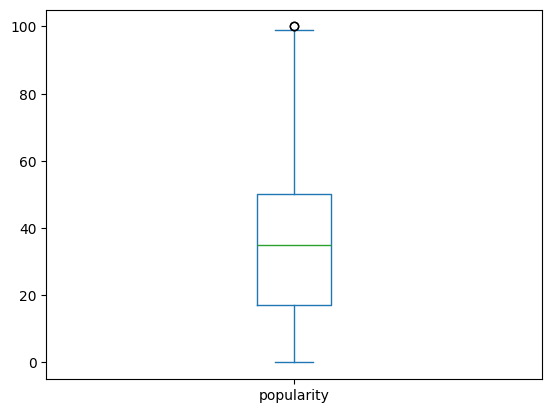

In [308]:
df['popularity'].plot.box()

Explicit Content Analysis:

Compare explicit and non-explicit tracks in terms of features like popularity, danceability, and energy.

In [317]:
popular_artists = df['artists'].value_counts()
popular_artists.head()

artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Name: count, dtype: int64

In [321]:
corr_matrix[corr_matrix > 0.5] 

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,1.000000,NaN,0.760545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,0.760545,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [320]:
popularity_matrix = corr_matrix['popularity'].sort_values(ascending=False)
popularity_matrix

popularity          1.000000
loudness            0.047268
danceability        0.033795
time_signature      0.030580
tempo               0.012151
energy             -0.002976
key                -0.004077
liveness           -0.005678
duration_ms        -0.008219
mode               -0.014434
acousticness       -0.022415
valence            -0.041328
speechiness        -0.045825
instrumentalness   -0.095300
Name: popularity, dtype: float64